In [95]:
from dataclasses import dataclass
from gvdot import Dot

@dataclass
class Task:
    id       : str
    name     : str
    requires : tuple[str, ...] = ()
    status   : str = "normal"

@dataclass
class Project:
    tasks: dict[str,Task]
    def __init__(self, tasklist:list[Task]):
        self.tasks = { task.id: task for task in tasklist }

example = Project([
    #Task("T1", "Requirements"),
    #Task("T2", "Design architecture", ("T1",)),
    #Task("T3", "Build dev env", ("T2",)),
    Task("T3", "Build dev env", ()),
    Task("T4", "Implement core", ("T3",)),
    Task("T5", "Implement UI", ("T3",), 'atrisk'),
    Task("T6", "Write system tests", ("T4",)),
    Task("T7", "Integrate", ("T4", "T5"), 'atrisk'),
    Task("T8", "Run system tests", ("T6", "T7"), 'critical'),
    #Task("T9", "Build deployment artifacts", ("T8",), 'critical'),
    #Task("T10", "Deploy", ("T9",), 'critical')
])

In [96]:
def task_diagram(project:Project):
    dot = Dot(directed=True)
    for id, task in project.tasks.items():
        dot.node(id, label=task.name,
                 role=task.status)
        for other in task.requires:
            dot.edge(other, id)
    return dot

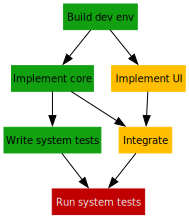

In [97]:
theme = (Dot()
    .node_default(shape="box", margin=0.1, style="filled",
                  fontsize=10, fontname="sans-serif",
                  width=0, height=0)
    .node_role("normal", color="#10a010")
    .node_role("atrisk", color="#ffbf00")
    .node_role("critical", color="#c00000", fontcolor="#e8e8e8")
)

task_diagram(example).use_theme(theme).show()